# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("https://raw.githubusercontent.com/ftarantuviez/Data/main/nhanes_2015_2016.csv")

In [13]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [14]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [15]:
labels = {1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 6: "Living with partner", 77: "Refused"}
da["DMDMARTL_labels"] = da["DMDMARTL"].replace(labels)

Text(0.5, 1.0, 'Count Frequency According Status')

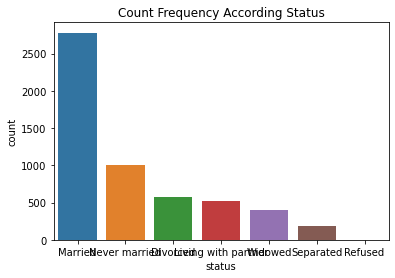

In [16]:
# frequency table for all people
df_DMDMARTL = pd.DataFrame([da.DMDMARTL_labels.value_counts()]).T
df_DMDMARTL.reset_index(inplace=True)
df_DMDMARTL.rename(columns={"index": "status", "DMDMARTL_labels": "count"}, inplace=True)

sns.barplot(x=df_DMDMARTL["status"], y=df_DMDMARTL["count"]).set_title("Count Frequency According Status")

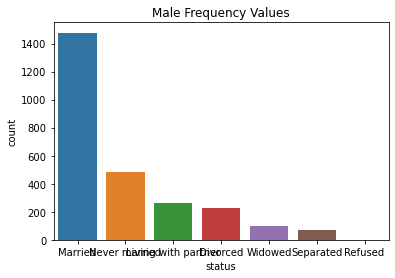

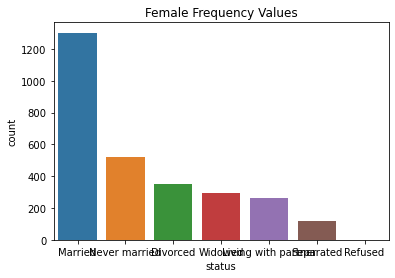

In [17]:
# frequency table by gender
male_table = pd.DataFrame(da[da["RIAGENDR"] == 1]["DMDMARTL_labels"].value_counts()).reset_index().rename(columns={"index": "status", "DMDMARTL_labels": "count"})
female_table = pd.DataFrame(da[da["RIAGENDR"] == 2]["DMDMARTL_labels"].value_counts()).reset_index().rename(columns={"index": "status", "DMDMARTL_labels": "count"})

sns.barplot(x=male_table["status"], y=male_table["count"]).set_title("Male Frequency Values")
plt.show()
sns.barplot(x=female_table["status"], y=female_table["count"]).set_title("Female Frequency Values")
plt.show()

In [18]:
# frequency by age >30 and <40
df_age = da[np.logical_and(da["RIDAGEYR"]<=40, da["RIDAGEYR"]>=30)]
df_age_male = df_age[df_age["RIAGENDR"] == 1]
df_age_female = df_age[df_age["RIAGENDR"] == 2]

In [19]:
print("Female and Males frequency values, age<40 and >30")
df_age["DMDMARTL_labels"].value_counts()

Female and Males frequency values, age<40 and >30


Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: DMDMARTL_labels, dtype: int64

In [20]:
print("Males frequency values, age<40 and >30")
df_age_male["DMDMARTL_labels"].value_counts()

Males frequency values, age<40 and >30


Married                275
Never married          101
Living with partner     78
Divorced                24
Separated               12
Widowed                  3
Refused                  1
Name: DMDMARTL_labels, dtype: int64

In [21]:
print("Females frequency values, age<40 and >30")
df_age_female["DMDMARTL_labels"].value_counts()

Females frequency values, age<40 and >30


Married                285
Never married          116
Living with partner     65
Divorced                46
Separated               18
Widowed                  2
Name: DMDMARTL_labels, dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

In [22]:
pd.DataFrame([male_table["status"], male_table["count"] - female_table["count"]]).T

,status,count
0,Married,174
1,Never married,-36
2,Living with partner,-85
3,Divorced,-67
4,Widowed,-162
5,Separated,-50
6,Refused,0


As we can see above, there are more people of gender male which is actually married. But in comparison in the other status, males are less than females

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [23]:
df_age_female_table = df_age_female["DMDMARTL_labels"].value_counts().reset_index().rename(columns={"index": "status", "DMDMARTL_labels": "count"})
display_side_by_side(pd.DataFrame(df_age_female_table), female_table)

,status,count
0,Married,285
1,Never married,116
2,Living with partner,65
3,Divorced,46
4,Separated,18
5,Widowed,2
,status,count
0,Married,1303
1,Never married,520
2,Divorced,350


In [24]:
print("Percentage that represents woman between [30,40] years in the marital status \n")
df_age_female_table["total_percentage"] = np.nan
for status, count in zip(female_table["status"], female_table["count"]):
    ind = df_age_female_table[df_age_female_table["status"] == status].index
    if len(ind)>0: 
        ind = ind[0] 
        val = df_age_female_table[df_age_female_table["status"] == status].values[0][1]
    
        df_age_female_table.at[ind, "total_percentage"] = (val * 100 // count)
df_age_female_table

Percentage that represents woman between [30,40] years in the marital status 



,status,count,total_percentage
0,Married,285,21.0
1,Never married,116,22.0
2,Living with partner,65,24.0
3,Divorced,46,13.0
4,Separated,18,15.0
5,Widowed,2,0.0


We can see that womans between [30, 40] years are most than the 20% of womans married, never married and living with partner. Also are less than the 13% of divorced womans and the 15% of separated ones.

__Q1c.__ Repeat part b for the men.

In [25]:
df_age_male_table = df_age_male["DMDMARTL_labels"].value_counts().reset_index().rename(columns={"index": "status", "DMDMARTL_labels": "count"})
display_side_by_side(pd.DataFrame(df_age_male_table), male_table)

,status,count
0,Married,275
1,Never married,101
2,Living with partner,78
3,Divorced,24
4,Separated,12
5,Widowed,3
6,Refused,1
,status,count
0,Married,1477
1,Never married,484


In [26]:
print("Percentage that represents woman between [30,40] years in the marital status \n")
df_age_male_table["total_percentage"] = np.nan
for status, count in zip(male_table["status"], male_table["count"]):
    ind = df_age_male_table[df_age_male_table["status"] == status].index
    if len(ind)>0: 
        ind = ind[0] 
        val = df_age_male_table[df_age_male_table["status"] == status].values[0][1]
    
        df_age_male_table.at[ind, "total_percentage"] = (val * 100 // count)
df_age_male_table

Percentage that represents woman between [30,40] years in the marital status 



,status,count,total_percentage
0,Married,275,18.0
1,Never married,101,20.0
2,Living with partner,78,29.0
3,Divorced,24,10.0
4,Separated,12,17.0
5,Widowed,3,3.0
6,Refused,1,100.0


## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [27]:
df_age_binned_female = da[da["RIAGENDR"] == 2][["DMDMARTL", "DMDMARTL_labels", "RIDAGEYR"]].reset_index(drop=True)
df_age_binned_female["RIDAGEYR_bin"] = pd.cut(da["RIDAGEYR"], [18, 28, 38, 48, 58, 68])
df_age_binned_female = df_age_binned_female.join([pd.get_dummies(df_age_binned_female["DMDMARTL_labels"])])

In [28]:
df_age_binned_female_groupped = df_age_binned_female.drop(columns=["DMDMARTL", "DMDMARTL_labels", "RIDAGEYR"]).groupby("RIDAGEYR_bin").sum().reset_index()
df_age_binned_female_groupped

,RIDAGEYR_bin,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
0,"(18, 28]",54,53,204,94,0,27,44
1,"(28, 38]",53,43,227,81,0,24,55
2,"(38, 48]",56,35,216,87,1,13,46
3,"(48, 58]",70,36,180,70,0,12,51
4,"(58, 68]",51,44,217,96,0,17,46


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [29]:
df_age_binned_male = da[da["RIAGENDR"] == 1][["DMDMARTL", "DMDMARTL_labels", "RIDAGEYR"]].reset_index(drop=True)
df_age_binned_male["RIDAGEYR_bin"] = pd.cut(da["RIDAGEYR"], [18, 28, 38, 48, 58, 68])
df_age_binned_male = df_age_binned_male.join([pd.get_dummies(df_age_binned_male["DMDMARTL_labels"])])
df_age_binned_male_groupped = df_age_binned_male.drop(columns=["DMDMARTL", "DMDMARTL_labels", "RIDAGEYR"]).groupby("RIDAGEYR_bin").sum().reset_index()
df_age_binned_male_groupped

,RIDAGEYR_bin,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
0,"(18, 28]",39.0,48.0,239.0,71.0,0.0,14.0,16.0
1,"(28, 38]",41.0,40.0,249.0,77.0,0.0,6.0,17.0
2,"(38, 48]",38.0,49.0,215.0,84.0,1.0,12.0,21.0
3,"(48, 58]",35.0,36.0,220.0,79.0,0.0,9.0,14.0
4,"(58, 68]",43.0,37.0,259.0,71.0,0.0,10.0,15.0


In [30]:
df_age_binned_female_groupped["gender"] = "female"
df_age_binned_male_groupped["gender"] = "male"

df_age_binned_female_groupped

,RIDAGEYR_bin,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed,gender
0,"(18, 28]",54,53,204,94,0,27,44,female
1,"(28, 38]",53,43,227,81,0,24,55,female
2,"(38, 48]",56,35,216,87,1,13,46,female
3,"(48, 58]",70,36,180,70,0,12,51,female
4,"(58, 68]",51,44,217,96,0,17,46,female


Comparion Female v. Male


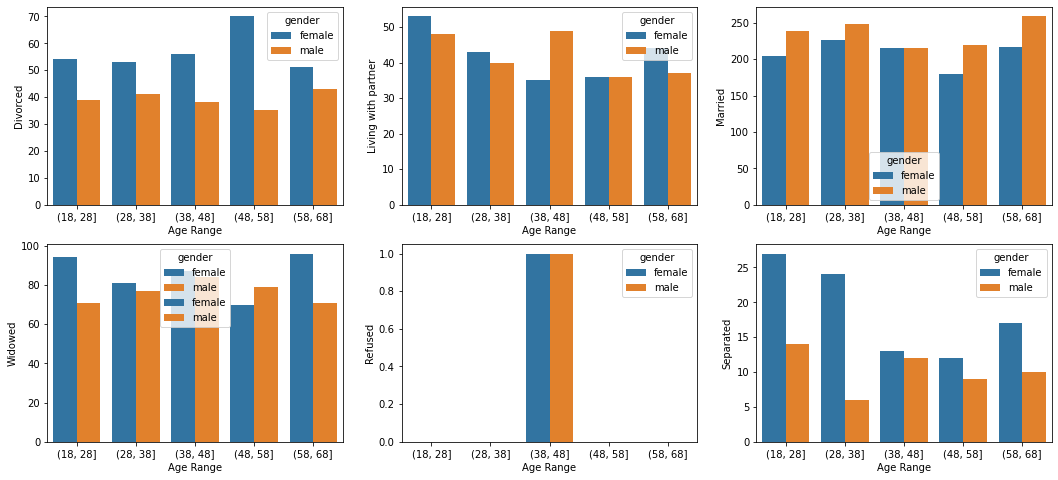

In [31]:
concat_df = pd.concat([df_age_binned_female_groupped, df_age_binned_male_groupped]).sort_values(by="RIDAGEYR_bin")

fig, axes = plt.subplots(2, 3, figsize=(18,8), squeeze=False)
j = 0
k = 0
print("Comparion Female v. Male")
for i, col in enumerate(concat_df.columns.values[1:-1]):
    if k == 3:
        k=0
    sns.barplot(x="RIDAGEYR_bin", y=col, hue="gender", data=concat_df, ax=axes[j, k])
    axes[j,k].set_xlabel("Age Range")
    if i == 2:
        j += 1
    k +=1

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

/home/francisco/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency of Height values')

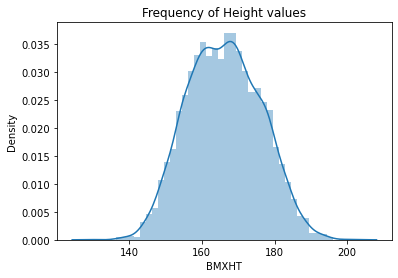

In [32]:
sns.distplot(da["BMXHT"].dropna())
plt.title("Frequency of Height values")

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

/home/francisco/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/francisco/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/francisco/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

Text(0.5, 0, 'Height')

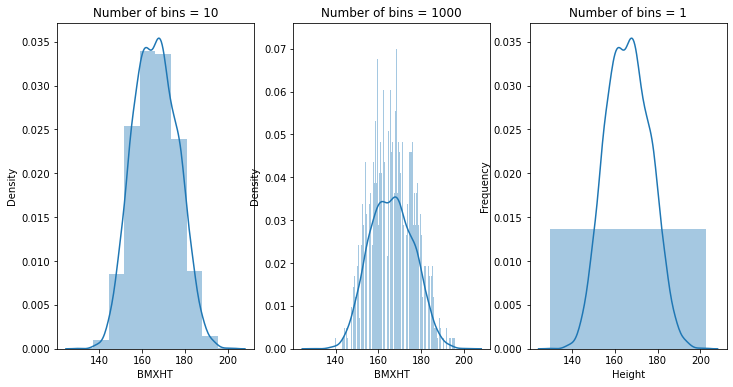

In [33]:
fig, axes = plt.subplots(1,3, figsize=(12,6))
sns.distplot(da["BMXHT"].dropna(), bins=10, ax=axes[0]).set_title("Number of bins = 10")
sns.distplot(da["BMXHT"].dropna(), bins=1000, ax=axes[1]).set_title("Number of bins = 1000")
sns.distplot(da["BMXHT"].dropna(), bins=1, ax=axes[2]).set_title("Number of bins = 1")
plt.ylabel("Frequency")
plt.xlabel("Height")

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

/home/francisco/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/francisco/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Female')

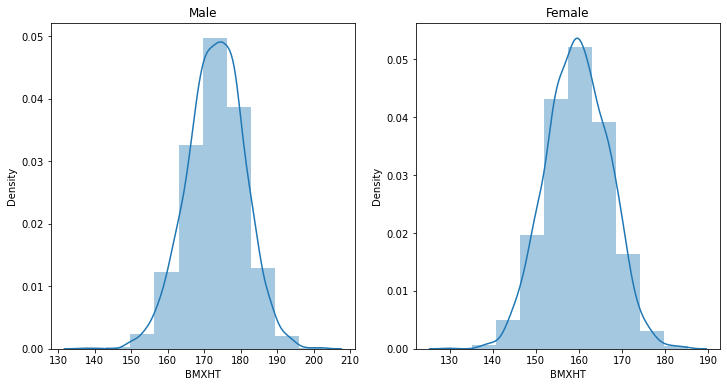

In [34]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.distplot(da[da["RIAGENDR"] == 1]["BMXHT"].dropna(), bins=10, ax=axes[0]).set_title("Male")
sns.distplot(da[da["RIAGENDR"] == 2]["BMXHT"].dropna(), bins=10, ax=axes[1]).set_title("Female")

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

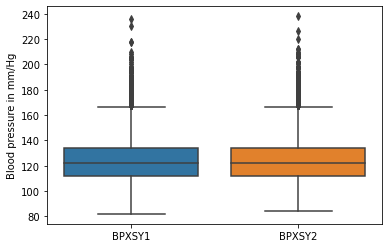

In [35]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

Text(0.5, 1.0, 'BPXSY2')

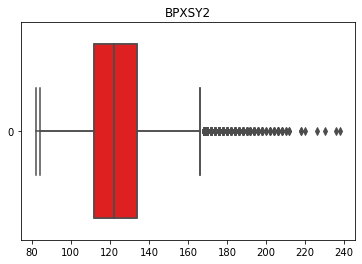

In [36]:
sns.boxplot(data=da.BPXSY1, color="blue", orient="h").set_title("BPXSY1")
sns.boxplot(data=da.BPXSY2, color="red", orient="h").set_title("BPXSY2")

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [37]:
education_label = {9: "Don't Know",7: "Refused",5: "College graduate or above", 4: "Some college or AA degree", 3: "High school graduate/GED or equivalent", 2: "9-11th grade (Includes 12th grade with no diploma)", 1: "Less than 9th grade" }
household_sizes = pd.DataFrame(da["DMDEDUC2"].value_counts()).reset_index().rename(columns={"index": "category", "DMDEDUC2": "count"})
household_sizes["proportion"] = household_sizes["count"].apply(lambda x: x/household_sizes["count"].sum())
household_sizes["education_label"] = household_sizes["category"].map(education_label)
household_sizes

,category,count,proportion,education_label
0,4.0,1621,0.296127,Some college or AA degree
1,5.0,1366,0.249543,College graduate or above
2,3.0,1186,0.216661,High school graduate/GED or equivalent
3,1.0,655,0.119657,Less than 9th grade
4,2.0,643,0.117464,9-11th grade (Includes 12th grade with no dipl...
5,9.0,3,0.000548,Don't Know


__Q5a.__ Comment on any major differences among the distributions.

<AxesSubplot:xlabel='education_label'>

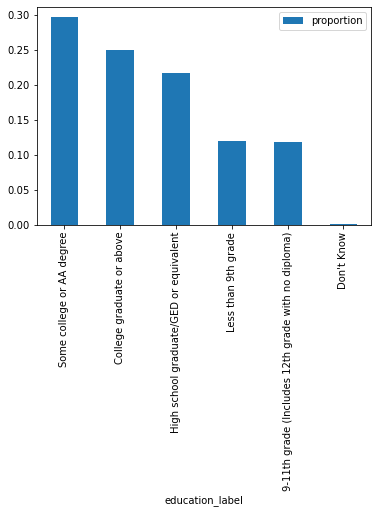

In [38]:
household_sizes.plot(kind="bar", x="education_label", y="proportion")

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [39]:
education_label = {9: "Don't Know",7: "Refused",5: "College graduate or above", 4: "Some college or AA degree", 3: "High school graduate/GED or equivalent", 2: "9-11th grade (Includes 12th grade with no diploma)", 1: "Less than 9th grade" }
household_sizes = pd.DataFrame(da[np.logical_and(da["RIDAGEYR"]<40,da["RIDAGEYR"]>30)]["DMDEDUC2"].value_counts()).reset_index().rename(columns={"index": "category", "DMDEDUC2": "count"})
household_sizes["proportion"] = household_sizes["count"].apply(lambda x: x/household_sizes["count"].sum())
household_sizes["education_label"] = household_sizes["category"].map(education_label)
household_sizes

,category,count,proportion,education_label
0,4.0,255,0.303933,Some college or AA degree
1,5.0,234,0.278903,College graduate or above
2,3.0,169,0.201430,High school graduate/GED or equivalent
3,2.0,98,0.116806,9-11th grade (Includes 12th grade with no dipl...
4,1.0,83,0.098927,Less than 9th grade


## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [40]:
df_6 = da[["SDMVSTRA", "SDMVPSU", "RIDAGEYR", "BMXHT", "BMXBMI", "RIAGENDR"]]
df_6_male = df_6[df_6["RIAGENDR"]==1]
df_6_female = df_6[df_6["RIAGENDR"]==2]

In [41]:
df_6_mvus_mean = df_6.drop(columns=["RIAGENDR"]).groupby(["SDMVSTRA", "SDMVPSU"]).mean()
df_6_mvus_male_mean = df_6_male.drop(columns=["RIAGENDR"]).groupby(["SDMVSTRA", "SDMVPSU"]).mean()
df_6_mvus_female_mean = df_6_female.drop(columns=["RIAGENDR"]).groupby(["SDMVSTRA", "SDMVPSU"]).mean()

In [42]:
print("Ratio of Age Mean Difference:: " + str(np.round(df_6_mvus_mean.RIDAGEYR.max() - df_6_mvus_mean.RIDAGEYR.min(),2)))
print("Ratio of Height Mean Difference:: " + str(np.round(df_6_mvus_mean.BMXHT.max() - df_6_mvus_mean.BMXHT.min(),2)))
print("Ratio of BMI Mean Difference:: " + str(np.round(df_6_mvus_mean.BMXBMI.max() - df_6_mvus_mean.BMXBMI.min(),2)))

Ratio of Age Mean Difference:: 11.98
Ratio of Height Mean Difference:: 7.2
Ratio of BMI Mean Difference:: 5.9


In [43]:
df_6_mvus_mean

RIDAGEYR       BMXHT     BMXBMI
SDMVSTRA SDMVPSU                                  
119      1        47.747059  165.148824  28.741765
         2        53.464567  163.977953  27.614286
120      1        43.381910  162.469898  31.683077
         2        44.482759  166.194483  27.564828
121      1        45.608911  165.825628  30.107576
         2        43.207447  167.496774  26.372043
122      1        43.875000  168.345714  28.938286
         2        45.747368  164.093651  26.157143
123      1        46.238806  167.812245  29.589286
         2        49.046243  166.859538  29.805780
124      1        51.232068  165.080426  29.099149
         2        45.062016  167.946875  28.228125
125      1        53.125000  167.478947  30.042105
         2        50.673267  167.383500  28.858291
126      1        47.250000  167.232402  30.242373
         2        47.902564  167.514583  29.336126
127      1        51.230769  163.715544  31.690625
         2        52.618557  165.265803  30.678646
128      1        54.779221  162.034649  32.060088
         2        45.707006  166.456688  27.161146
129      1        44.641304  163.763187  27.797802
         2        44.582524  166.666832  29.211881
130      1        49.119565  169.231522  30.524457
         2        50.690821  167.338119  30.397525
131      1        53.960199  169.176382  29.115152
         2        45.793991  167.740870  31.670000
132      1        42.802139  166.902688  29.211290
         2        50.374517  165.920079  29.759843
133      1        44.620253  164.473377  27.741176
         2        47.279793  164.936126  28.480628